In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2

In [16]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from lightgbm import LGBMClassifier

In [17]:
df = pd.read_csv("data.csv")

In [18]:
df.head()

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green


In [19]:
df.shape

(5007, 4)

In [20]:
df["label"].nunique()

11

In [21]:
df.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

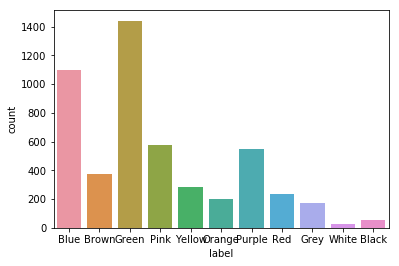

In [22]:
df["label"].value_counts()
sns.countplot(x=df["label"], data=df)

In [23]:
df.loc[df["label"] == 9]

,red,green,blue,label


In [24]:
le = LabelEncoder()
le.fit_transform(df["label"])
print(le.inverse_transform([0, 1, 2, 3, 4, 5, 6 , 7, 8, 9, 10]))
df["label"] = le.fit_transform(df["label"])
#le.inverse_transform([0, 1, 2, 3, 4, 5, 6 , 7, 8, 9, 10])

X = df.drop('label', axis=1)
y = df["label"]



print(X.head())
print(y.head())
y.shape

['Black' 'Blue' 'Brown' 'Green' 'Grey' 'Orange' 'Pink' 'Purple' 'Red'
 'White' 'Yellow']
   red  green  blue
0   20    139   240
1  174     83    72
2  144    249   131
3  168     25   156
4   30    182   136
0    1
1    2
2    3
3    6
4    3
Name: label, dtype: int64


C:\Users\LENOVO\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(5007,)

In [ ]:
X_np = np.array(X)
X_np_slices = X_np[:100]
for i in range(X_np_slices.shape[0]):
    print(i+1)
    a = np.array(X_np[i])
    a = a.reshape(1,3)
    plt.imshow([a])
    plt.axis('off')
    plt.show()

In [28]:
color_dict = {0: "Black",
             1: "Blue",
             2: "Brown",
             3: "Green",
             4: "Grey",
             5: "Orange",
             6: "Pink",
             7: "Purple",
             8: "Red",
             9: "White",
             10: "Yellow"}

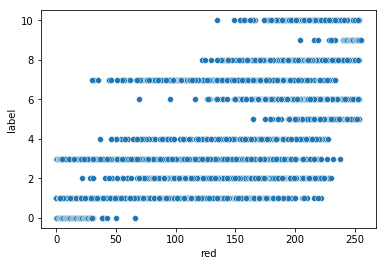

In [29]:
sns.scatterplot(x=df["red"], y=df["label"], data=df)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [31]:
model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 4005, number of used features: 3
[LightGBM] [Info] Start training from score -4.581727
[LightGBM] [Info] Start training from score -1.530260
[LightGBM] [Info] Start training from score -2.625418
[LightGBM] [Info] Start training from score -1.243443
[LightGBM] [Info] Start training from score -3.360825
[LightGBM] [Info] Start training from score -3.195432
[LightGBM] [Info] Start training from score -2.206254
[LightGBM] [Info] Start training from score -2.179407
[LightGBM] [Info] Start training from score -2.996981
[LightGBM] [Info] Start training from score -5.204256
[LightGBM] [Info] Start training from score -2.844260
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [32]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [33]:
y_pred = model.predict(X_test)
y_np = y_test.values
print(y_np[0:25])
print(y_pred[0:25])

[1 7 6 3 1 6 3 2 3 2 6 6 2 3 1 3 1 3 1 2 3 2 6 1 3]
[1 7 6 3 1 6 3 2 3 2 6 6 2 3 1 3 1 4 1 2 3 2 6 1 1]


C:\Users\LENOVO\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_np, y_pred)
rmse = np.sqrt(mse)
print(rmse)

1.4644830415004182


C:\Users\LENOVO\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


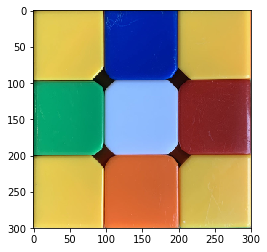

In [35]:
img = cv2.imread("yedek.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (300, 300))
plt.imshow(img_rgb)

In [36]:
picsel_centers = [(50,50), (50,150), (50,250),
              (150,50), (150,150), (150, 250),
              (250,50), (250,150), (250,250)]

In [38]:
print(X_test.ndim)
print(X_test.shape)
print(type(X_test))
X_test.head()

2
(1002, 3)
<class 'pandas.core.frame.DataFrame'>


,red,green,blue
4004,22,160,221
1739,138,48,233
2471,208,115,205
1669,116,129,31
1521,40,75,127


In [39]:

rnge1 = -50
rnge2 = -50
for i in range(3):
    rnge2 = -50
    rnge1 = rnge1 + 100 
    for j in range(3):

        rnge2 = rnge2 + 100

        color_area = img_rgb[rnge1-25: rnge1+25, rnge2-25: rnge2+25]
        red_mean = int(color_area[:,:,0].mean())
        green_mean = int(color_area[:,:,1].mean())
        blue_mean = int(color_area[:,:,2].mean())
        #print(red_mean)
        #print(green_mean)
        #print(blue_mean)
        picsels = np.array([red_mean, green_mean, blue_mean])
        picsels = picsels.reshape(1, 3)

        #print(picsels)
        print(color_dict[model.predict(picsels)[0]])
        
    
    

Yellow
Blue
Yellow
Green
Blue
Brown
Yellow
Orange
Yellow


C:\Users\LENOVO\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\preprocessing\label.py:151: De

Renk Aralıkları:
Küme 1: R=192, G=32, B=201
Küme 2: R=106, G=128, B=38
Küme 3: R=131, G=206, B=209
Küme 4: R=214, G=208, B=118
Küme 5: R=103, G=35, B=125
Küme 6: R=41, G=124, B=124
Küme 7: R=127, G=101, B=212
Küme 8: R=39, G=44, B=44
Küme 9: R=40, G=222, B=166
Küme 10: R=223, G=122, B=194
Küme 11: R=216, G=128, B=39
Küme 12: R=50, G=208, B=43
Küme 13: R=163, G=120, B=123
Küme 14: R=164, G=38, B=38
Küme 15: R=180, G=215, B=36
Küme 16: R=213, G=215, B=216
Küme 17: R=45, G=46, B=206
Küme 18: R=47, G=163, B=220
Küme 19: R=110, G=199, B=113
Küme 20: R=217, G=45, B=103

Renklerin Kümelere Aidiyeti:


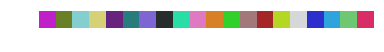

In [40]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_train = np.array(X_train)

# K-Means modelini oluşturun ve eğitin
kmeans = KMeans(n_clusters=20)  # Küme sayısını ayarlayın (renk aralıkları)
kmeans.fit(X_train)

# Küme merkezlerini alın
cluster_centers = kmeans.cluster_centers_

# Renk aralıklarını belirleyin
rgb_clusters = cluster_centers.astype(int)

# Küme merkezlerini görüntüleyin
print("Renk Aralıkları:")
for i, cluster in enumerate(rgb_clusters):
    print(f"Küme {i + 1}: R={cluster[0]}, G={cluster[1]}, B={cluster[2]}")

# Renklerin hangi kümelere ait olduğunu görüntüleyin
labels = kmeans.labels_
print("\nRenklerin Kümelere Aidiyeti:")
#for i, label in enumerate(labels):
    #print(f"RGB ({X_train[i][0]}, {X_train[i][1]}, {X_train[i][2]}) -> Küme {label + 1}")

# Küme merkezlerini görselleştirin
plt.imshow([rgb_clusters])
plt.axis('off')
plt.show()

[[231 200  79]]


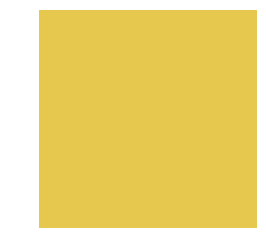

3
[[  0  29 163]]


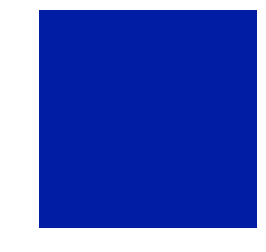

16
[[217 181  74]]


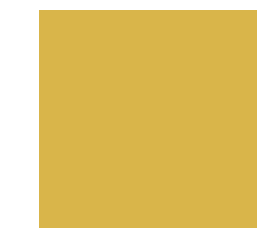

3
[[  3 160 109]]


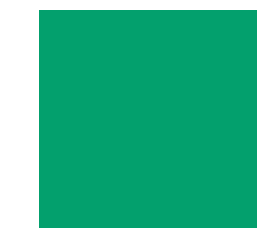

5
[[142 187 254]]


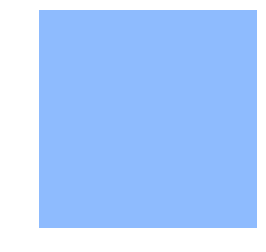

2
[[125  33  34]]


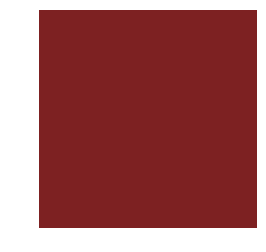

13
[[229 196  77]]


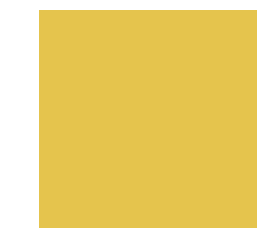

3
[[209  99  49]]


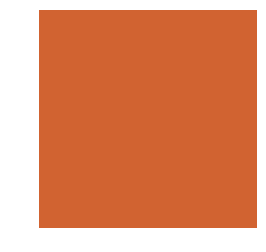

10
[[212 180  84]]


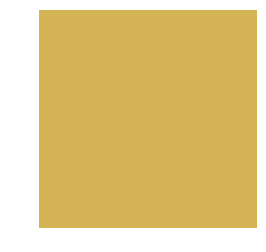

3


In [43]:
rnge1 = -50
rnge2 = -50
for i in range(3):
    rnge2 = -50
    rnge1 = rnge1 + 100 
    for j in range(3):

        rnge2 = rnge2 + 100

        color_area = img_rgb[rnge1-10: rnge1+10, rnge2-10: rnge2+10]
        red_mean = int(color_area[:,:,0].mean())
        green_mean = int(color_area[:,:,1].mean())
        blue_mean = int(color_area[:,:,2].mean())
        #print(red_mean)
        #print(green_mean)
        #print(blue_mean)

        picsels = np.array([red_mean, green_mean, blue_mean])
        picsels = picsels.reshape(1, 3)
        
        print(picsels)
        
        plt.imshow([picsels])
        plt.axis('off')
        plt.show()

        #print(picsels)
        print(kmeans.predict(picsels)[0])